# NETWORK FAILURE  PREDICTION MODEL

Steps to Follow When Perfoming Time series Analysis 

1.Data Collection
2.Data Exploration and Assesement
3.Data Preprocessing and Cleaning
4.Stationarity
5.Choosing Model
6.Model Fitting
7.Forecasting
8.Model Evaluation


In [1]:
# ----------------------------------------------Importing modules that are neccessary for the Prediction--------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import Series
from sklearn.utils import resample # for sampling
#----------------------------------------------STEP 1 DATA COLLECTION-----------------------------------------------------------
df = pd.read_csv('/home/takudzwa/Documents/Projects/WebApp-Projects/data_set/Dataset-Unicauca-Version2-87Atts.csv')
df.shape

(1048575, 87)

In [17]:
#---------------------------------------------DATA EXPLORATION AND ASSESEMENT(DATA ANALAYSIS)-------------------------------------
print('Head of the Data Set',df.head(n=5))
print('Tail of the Data Set',df.tail(n=5))


Head of the Data Set                                      Flow.ID       Source.IP  Source.Port  \
0    172.19.1.46-192.168.245.10-52422-3128-6     172.19.1.46        52422   
1    172.19.1.46-192.168.245.10-52422-3128-6  192.168.245.10         3128   
2       10.200.7.217-50.31.185.39-38848-80-6    50.31.185.39           80   
3       10.200.7.217-50.31.185.39-38848-80-6    50.31.185.39           80   
4  192.168.72.43-192.168.245.10-55961-3128-6   192.168.72.43        55961   

   Destination.IP  Destination.Port  Protocol           Timestamp  \
0  192.168.245.10              3128         6  26/04/201711:11:17   
1     172.19.1.46             52422         6  26/04/201711:11:17   
2    10.200.7.217             38848         6  26/04/201711:11:17   
3    10.200.7.217             38848         6  26/04/201711:11:17   
4  192.168.245.10              3128         6  26/04/201711:11:17   

   Flow.Duration  Total.Fwd.Packets  Total.Backward.Packets  ...  Active.Std  \
0          45523     

In [6]:
#Showing the basic statistics of the data
df.describe()

Source.Port  Destination.Port      Protocol  Flow.Duration  \
count  1.048575e+06      1.048575e+06  1.048575e+06   1.048575e+06   
mean   3.569082e+04      1.291848e+04  6.005119e+00   2.112849e+07   
std    2.267147e+04      2.116656e+04  3.248193e-01   3.711712e+07   
min    0.000000e+00      0.000000e+00  0.000000e+00   1.000000e+00   
25%    3.128000e+03      4.430000e+02  6.000000e+00   5.640000e+02   
50%    4.698400e+04      3.128000e+03  6.000000e+00   3.133100e+05   
75%    5.306000e+04      3.128000e+03  6.000000e+00   1.992396e+07   
max    6.553400e+04      6.553400e+04  1.700000e+01   1.200000e+08   

       Total.Fwd.Packets  Total.Backward.Packets  Total.Length.of.Fwd.Packets  \
count       1.048575e+06            1.048575e+06                 1.048575e+06   
mean        5.465246e+01            6.140241e+01                 3.470609e+04   
std         9.892436e+02            1.294176e+03                 1.575671e+06   
min         1.000000e+00            0.000000e+00                 0.000000e+00   
25%         2.000000e+00            1.000000e+00                 6.000000e+00   
50%         5.000000e+00            4.000000e+00                 3.140000e+02   
75%         1.500000e+01            1.500000e+01                 1.702000e+03   
max         3.286950e+05            5.421960e+05                 6.780236e+08   

       Total.Length.of.Bwd.Packets  Fwd.Packet.Length.Max  \
count                 1.048575e+06           1.048575e+06   
mean                  9.915793e+04           4.943220e+02   
std                   3.023639e+06           1.011026e+03   
min                   0.000000e+00           0.000000e+00   
25%                   0.000000e+00           6.000000e+00   
50%                   6.900000e+01           1.660000e+02   
75%                   3.876000e+03           5.970000e+02   
max                   1.345796e+09           2.982000e+04   

       Fwd.Packet.Length.Min  ...  min_seg_size_forward   Active.Mean  \
count           1.048575e+06  ...          1.048575e+06  1.048575e+06   
mean            7.226746e+00  ...          2.590404e+01  2.470705e+05   
std             8.181314e+01  ...          6.029654e+00  2.018038e+06   
min             0.000000e+00  ...         -1.000000e+00  0.000000e+00   
25%             0.000000e+00  ...          2.000000e+01  0.000000e+00   
50%             0.000000e+00  ...          2.000000e+01  0.000000e+00   
75%             6.000000e+00  ...          3.200000e+01  0.000000e+00   
max             1.606000e+04  ...          4.800000e+01  1.138933e+08   

         Active.Std    Active.Max    Active.Min     Idle.Mean      Idle.Std  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.443851e+05  4.252302e+05  1.441728e+05  7.093360e+06  1.115743e+06   
std    1.048899e+06  2.744389e+06  1.809586e+06  1.598250e+07  4.398582e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    7.225154e+07  1.138933e+08  1.138933e+08  1.200000e+08  7.516046e+07   

           Idle.Max      Idle.Min    L7Protocol  
count  1.048575e+06  1.048575e+06  1.048575e+06  
mean   8.076663e+06  6.058889e+06  9.611647e+01  
std    1.764365e+07  1.497405e+07  5.484653e+01  
min    0.000000e+00  0.000000e+00  5.000000e+00  
25%    0.000000e+00  0.000000e+00  7.000000e+01  
50%    0.000000e+00  0.000000e+00  1.260000e+02  
75%    0.000000e+00  0.000000e+00  1.300000e+02  
max    1.200000e+08  1.200000e+08  2.220000e+02  

[8 rows x 81 columns]

In [2]:
#Checking for missing values 
df_missing = df.isnull()
print(df_missing.sum()) # shows the sum of all missing values
df_new = df.dropna() # Incase there are any missing values we drop


Flow.ID             0
Source.IP           0
Source.Port         0
Destination.IP      0
Destination.Port    0
                   ..
Idle.Max            0
Idle.Min            0
Label               0
L7Protocol          0
ProtocolName        0
Length: 87, dtype: int64


In [3]:
#visualizing the data
df_plot = df[['Timestamp','ACK.Flag.Count']]
df_plot.plot(figsize =(15,7))
print('ACK')
plt.show()

ACK


Ratio


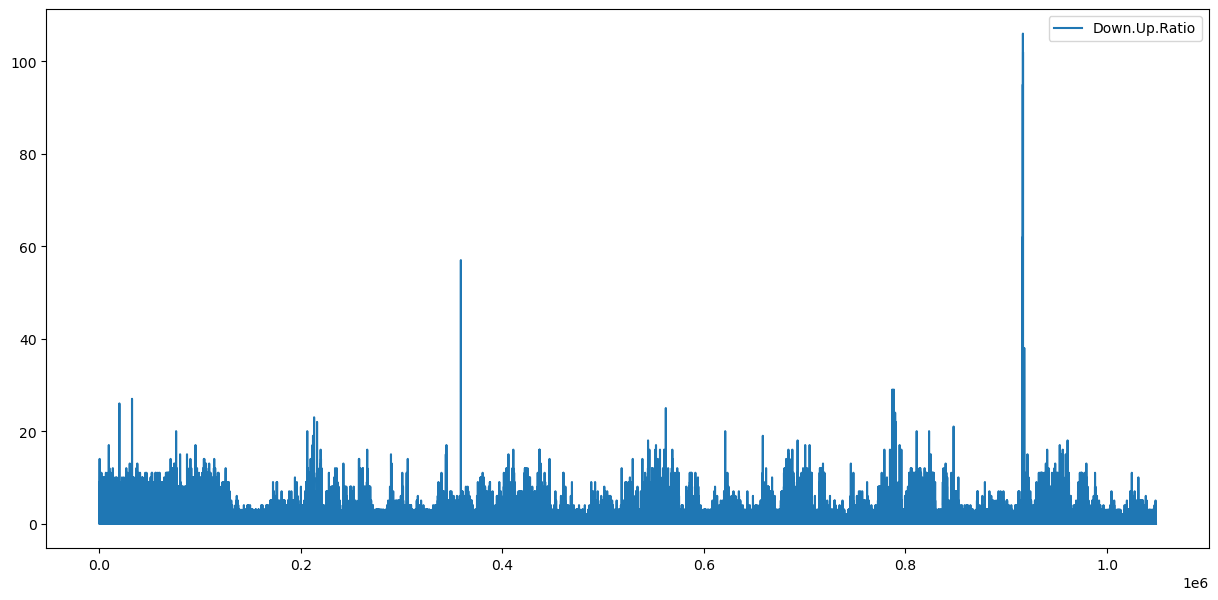

In [3]:
#visualizing the data
df_plot = df[['Timestamp','Down.Up.Ratio']]
df_plot.plot(figsize =(15,7))
print('Ratio')
plt.show()

In [4]:
#-----------------------------------------------------DATA PREPROCESSING AND CLEANING--------------------------------------------------
#1. Cleaning
#Selecting columns that are not going to be used in the analyis and dropping the one not required
#df_new.info() #Displating all the 84 Columns

In [61]:
#Data Preprocessing
#converting into the correct format

df_new['Timestamp'] = pd.to_datetime(df_new['Timestamp'],format='%d/%m/%Y%H:%M:%S')
df_new['Time'] = df_new['Timestamp'].dt.time
df_new['Date'] =df_new['Timestamp'].dt.date
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new.sort_values(by='Timestamp', inplace=True)
df_new['Interval'] = df_new['Date'].diff()
# df_new.set_index('Time')
# print(df_new.info())
# print(df_new.index.name)
df_drop = df_new[['Flow.ID','Timestamp','Date','Time','Source.IP','Source.Port','Destination.IP',
                  'Destination.Port','Flow.Duration','Protocol','ACK.Flag.Count'
                 ,'Down.Up.Ratio','ProtocolName','Interval']]
df_drop.shape


(1048575, 14)

In [62]:
df_drop.head(n=50)


Flow.ID           Timestamp  \
271021        192.168.42.62-10.200.7.5-52148-3128-6 2017-04-26 03:03:25   
140267      10.200.7.195-64.233.190.189-36041-443-6 2017-04-26 03:03:25   
245830       192.168.142.52-10.200.7.4-59069-3128-6 2017-04-26 03:03:25   
229118     173.194.214.189-10.200.7.195-443-43812-6 2017-04-26 03:03:25   
247512       192.168.180.14-10.200.7.6-48618-3128-6 2017-04-26 03:03:25   
138693       10.200.7.195-104.91.156.236-37810-80-6 2017-04-26 03:03:25   
243775        192.168.131.17-10.200.7.4-2335-3128-6 2017-04-26 03:03:25   
247478       192.168.180.14-10.200.7.6-48592-3128-6 2017-04-26 03:03:25   
130609        10.200.7.194-52.73.250.80-33607-443-6 2017-04-26 03:03:25   
247477       192.168.180.14-10.200.7.6-48568-3128-6 2017-04-26 03:03:25   
293542         10.200.7.194-69.31.54.133-35199-80-6 2017-04-26 03:03:25   
138697       10.200.7.195-104.91.156.236-37822-80-6 2017-04-26 03:03:25   
247476       192.168.180.14-10.200.7.6-48592-3128-6 2017-04-26 03:03:25   
138698        216.58.219.68-10.200.7.195-80-34019-6 2017-04-26 03:03:25   
138699         10.200.7.195-38.90.226.13-57438-80-6 2017-04-26 03:03:25   
221209         192.168.72.44-10.200.7.9-3175-3128-6 2017-04-26 03:03:25   
229112     173.194.214.189-10.200.7.195-443-40954-6 2017-04-26 03:03:25   
146166       10.200.7.195-104.91.156.236-37810-80-6 2017-04-26 03:03:25   
170495         10.200.7.217-104.28.19.71-45907-80-6 2017-04-26 03:03:25   
146153       10.200.7.195-104.91.156.236-37820-80-6 2017-04-26 03:03:25   
247507       192.168.180.14-10.200.7.6-48586-3128-6 2017-04-26 03:03:25   
256944   192.168.32.108-192.168.245.10-60080-3128-6 2017-04-26 03:03:25   
225441      10.200.7.217-108.177.11.189-37609-443-6 2017-04-26 03:03:25   
225449      10.200.7.218-108.177.11.189-55721-443-6 2017-04-26 03:03:25   
247523       192.168.180.14-10.200.7.6-48614-3128-6 2017-04-26 03:03:25   
247522       192.168.180.14-10.200.7.6-48598-3128-6 2017-04-26 03:03:25   
225329        10.200.7.217-104.129.31.10-44279-80-6 2017-04-26 03:03:25   
203952   192.168.180.14-192.168.245.10-56515-3128-6 2017-04-26 03:03:25   
203950  192.168.220.105-192.168.245.10-50973-3128-6 2017-04-26 03:03:25   
292830      10.200.7.195-64.233.190.189-56445-443-6 2017-04-26 03:03:25   
292826      10.200.7.218-64.233.190.189-46708-443-6 2017-04-26 03:03:25   
285008         192.168.81.2-10.200.7.6-51088-3128-6 2017-04-26 03:03:25   
187637      10.200.7.218-64.233.190.189-50060-443-6 2017-04-26 03:03:25   
139268       10.200.7.195-104.25.219.103-56002-80-6 2017-04-26 03:03:25   
138694         10.200.7.195-23.9.61.213-59140-443-6 2017-04-26 03:03:25   
152488           192.0.73.2-10.200.7.196-80-47203-6 2017-04-26 03:03:25   
220738         10.200.7.9-10.230.1.161-3128-49613-6 2017-04-26 03:03:25   
288538    192.168.90.65-192.168.245.10-56286-3128-6 2017-04-26 03:03:25   
220729       192.168.90.108-10.200.7.9-56062-3128-6 2017-04-26 03:03:25   
139160        10.200.7.195-104.20.26.122-44993-80-6 2017-04-26 03:03:25   
130600      173.194.27.234-10.200.7.194-443-35318-6 2017-04-26 03:03:25   
278614       192.168.72.103-10.200.7.9-54538-3128-6 2017-04-26 03:03:25   
152375        10.200.7.196-63.251.88.56-52543-443-6 2017-04-26 03:03:25   
152397       10.200.7.196-40.97.118.178-55394-443-6 2017-04-26 03:03:25   
291234      216.58.202.229-10.200.7.218-443-53078-6 2017-04-26 03:03:25   
152417        10.200.7.196-31.220.20.135-42193-80-6 2017-04-26 03:03:25   
291233      216.58.202.229-10.200.7.196-443-46532-6 2017-04-26 03:03:25   
291232      216.58.202.229-10.200.7.199-443-37328-6 2017-04-26 03:03:25   
152377         10.200.7.196-23.9.51.111-33716-443-6 2017-04-26 03:03:25   
276881    192.168.60.44-192.168.245.10-49526-3128-6 2017-04-26 03:03:25   

             Date      Time        Source.IP  Source.Port   Destination.IP  \
271021 2017-04-26  03:03:25    192.168.42.62        52148       10.200.7.5   
140267 2017-04-26  03:03:25     10.200.7.195        36041   64

In [73]:
#Data Preprocessing
df_drop.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 271021 to 997142
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype          
---  ------            --------------    -----          
 0   Flow.ID           1048575 non-null  object         
 1   Timestamp         1048575 non-null  datetime64[ns] 
 2   Date              1048575 non-null  datetime64[ns] 
 3   Time              1048575 non-null  object         
 4   Source.IP         1048575 non-null  object         
 5   Source.Port       1048575 non-null  int64          
 6   Destination.IP    1048575 non-null  object         
 7   Destination.Port  1048575 non-null  int64          
 8   Flow.Duration     1048575 non-null  int64          
 9   Protocol          1048575 non-null  int64          
 10  ACK.Flag.Count    1048575 non-null  int64          
 11  Down.Up.Ratio     1048575 non-null  int64          
 12  ProtocolName      1048575 non-null  object         
 13  Interval          1048574 no

In [17]:
#changing data type and setting index
#df_drop['Timestamp'] = pd.to_datetime(df_drop['Timestamp'])
#df_drop = df_drop.set_index('Timestamp').resample('D').mean()
#df_drop.info()

In [74]:
df_drop[['Flow.ID']].value_counts()

Flow.ID                                   
192.168.10.58-10.200.7.4-50555-3128-6         199
192.168.180.14-10.200.7.8-52792-3128-6        192
192.168.180.14-10.200.7.5-51613-3128-6        176
192.168.180.16-192.168.245.10-55146-3128-6    127
172.16.255.183-10.200.7.4-53-52931-17         115
                                             ... 
179.1.4.244-10.200.7.194-443-40875-6            1
179.1.4.244-10.200.7.194-443-40876-6            1
179.1.4.244-10.200.7.194-443-41656-6            1
179.1.4.244-10.200.7.194-443-42110-6            1
192.168.10.117-10.200.7.8-52508-3128-6          1
Name: count, Length: 442483, dtype: int64

In [75]:
#Checking for Resampling or not
df_drop['Down.Up.Ratio'].value_counts()

Down.Up.Ratio
0      485456
1      361490
2      100256
3       40119
4       25503
5       21249
6        8427
7        2962
8        1279
9         834
11        381
10        296
12        157
13         38
14         34
15         22
16         21
17         13
20          6
19          4
18          4
21          3
24          2
29          2
23          2
26          2
22          2
57          1
25          1
27          1
38          1
40          1
62          1
102         1
95          1
106         1
61          1
30          1
Name: count, dtype: int64

In [76]:
df_drop['ACK.Flag.Count'].value_counts()

ACK.Flag.Count
1    628114
0    420461
Name: count, dtype: int64

In [63]:
#sampling 

majority_class = df_drop['ACK.Flag.Count'].mode()[0]
minority_class = 1 - majority_class

print(f'minority classs {minority_class}, majority class {majority_class}')

# ----------------------------------- Downsample majority class to match minority-----------------------------------------
# Downsample majority class to match minority class size
majority_downsampled = resample(
    df_drop[df_drop['ACK.Flag.Count'] == majority_class],
    replace=False,  # Avoid duplicates
    n_samples=len(df_drop[df_drop['ACK.Flag.Count'] == minority_class]),
    random_state=42  # Set random seed for reproducibility
)

# Combine downsampled majority with minority class
downsampled_df = pd.concat([majority_downsampled, df_drop[df_drop['ACK.Flag.Count'] == minority_class]])

print(downsampled_df['ACK.Flag.Count'].value_counts())



minority classs 0, majority class 1
ACK.Flag.Count
1    420461
0    420461
Name: count, dtype: int64


In [80]:
#slecting only data for single router clients to work with
downsampled_df['Date'] = pd.to_datetime(downsampled_df['Date'])
downsampled_df.sort_values(by='Timestamp', inplace=True)
df_drop_new = downsampled_df.loc[df_drop['Source.IP']== '10.200.7.4']


#Exporting the dataset to Djnago
df_drop_new.head(n=5)

Flow.ID           Timestamp       Date  \
201326    192.168.50.2-10.200.7.4-49482-3128-6 2017-04-26 03:03:25 2017-04-26   
201386   192.168.10.28-10.200.7.4-50822-3128-6 2017-04-26 03:03:25 2017-04-26   
201349   192.168.72.94-10.200.7.4-55144-3128-6 2017-04-26 03:03:26 2017-04-26   
201339  192.168.60.136-10.200.7.4-55039-3128-6 2017-04-26 03:03:26 2017-04-26   
201322   172.16.255.183-10.200.7.4-53-52931-17 2017-04-26 03:03:26 2017-04-26   

            Time   Source.IP  Source.Port  Destination.IP  Destination.Port  \
201326  03:03:25  10.200.7.4         3128    192.168.50.2             49482   
201386  03:03:25  10.200.7.4         3128   192.168.10.28             50822   
201349  03:03:26  10.200.7.4         3128   192.168.72.94             55144   
201339  03:03:26  10.200.7.4         3128  192.168.60.136             55039   
201322  03:03:26  10.200.7.4        52931  172.16.255.183                53   

        Flow.Duration  Protocol  ACK.Flag.Count  Down.Up.Ratio ProtocolName  \
201326      115181322         6               1              0   HTTP_PROXY   
201386       90581539         6               1              0   HTTP_PROXY   
201349       95908868         6               1              0   HTTP_PROXY   
201339      107066693         6               1              0   HTTP_PROXY   
201322      119039510        17               0              0          DNS   

       Interval  
201326   0 days  
201386   0 days  
201349   0 days  
201339   0 days  
201322   0 days

In [84]:
#Exporing the dataset to Djnago
df_drop_new.to_csv('/home/takudzwa/Documents/Projects/WebApp-Projects/Time_series/web_application/PredictionModel/NetworkFalure.csv',index=False)
df_drop_new.shape
print(df_drop_new.head(n=5))

                                       Flow.ID           Timestamp       Date  \
201326    192.168.50.2-10.200.7.4-49482-3128-6 2017-04-26 03:03:25 2017-04-26   
201386   192.168.10.28-10.200.7.4-50822-3128-6 2017-04-26 03:03:25 2017-04-26   
201349   192.168.72.94-10.200.7.4-55144-3128-6 2017-04-26 03:03:26 2017-04-26   
201339  192.168.60.136-10.200.7.4-55039-3128-6 2017-04-26 03:03:26 2017-04-26   
201322   172.16.255.183-10.200.7.4-53-52931-17 2017-04-26 03:03:26 2017-04-26   

            Time   Source.IP  Source.Port  Destination.IP  Destination.Port  \
201326  03:03:25  10.200.7.4         3128    192.168.50.2             49482   
201386  03:03:25  10.200.7.4         3128   192.168.10.28             50822   
201349  03:03:26  10.200.7.4         3128   192.168.72.94             55144   
201339  03:03:26  10.200.7.4         3128  192.168.60.136             55039   
201322  03:03:26  10.200.7.4        52931  172.16.255.183                53   

        Flow.Duration  Protocol  ACK.F

In [97]:
#re-importing the dataset
df_predict = pd.read_csv('/home/takudzwa/Documents/Projects/WebApp-Projects/Time_series/web_application/PredictionModel/NetworkFalure.csv')
df_time = df_predict['Timestamp']
df_time.head(n=1)




0    2017-04-26 03:03:25
Name: Timestamp, dtype: object

In [86]:
df_predict[['Flow.ID']].value_counts()


Flow.ID                               
192.168.10.58-10.200.7.4-50555-3128-6     136
172.16.255.183-10.200.7.4-53-52931-17     110
192.168.180.16-10.200.7.4-45510-3128-6     40
192.168.42.68-10.200.7.4-1479-3128-6       34
192.168.90.73-10.200.7.4-52410-3128-6      31
                                         ... 
192.168.150.16-10.200.7.4-49824-3128-6      1
192.168.150.16-10.200.7.4-49819-3128-6      1
192.168.150.16-10.200.7.4-49816-3128-6      1
192.168.150.16-10.200.7.4-49815-3128-6      1
192.168.180.14-10.200.7.4-38172-3128-6      1
Name: count, Length: 13732, dtype: int64

In [120]:
import matplotlib.pyplot as plt
df_display = df_predict[(df_predict['Date'] == '2017-04-26') ]
df_predict = df_display
df_display2 = df_predict[(df_predict['Time'] >= '03:18:19') & (df_predict['Time'] <= '03:20:17')]
df_predict = df_display2

df_Ratio = df_predict['Down.Up.Ratio']
df_time = df_predict['Time']

df_ack = df_predict['ACK.Flag.Count']
df_time = df_predict['Time']

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  # Increase height by changing the second value

# Plot for the first subplot
ax1.plot(df_time, df_Ratio)
ax1.set_title('DownUp Ratio for the whole network')
ax1.set_xlabel('Time')
ax1.set_ylabel('DownUp Ratio')
ax1.tick_params(axis='x', rotation=85)

# Plot for the second subplot
ax2.plot(df_time, df_ack)
ax2.set_title('ACK for the for Whole')
ax2.set_xlabel('Time')
ax2.set_ylabel('ACK')
ax2.tick_params(axis='x', rotation=85)

plt.tight_layout()
plt.show()


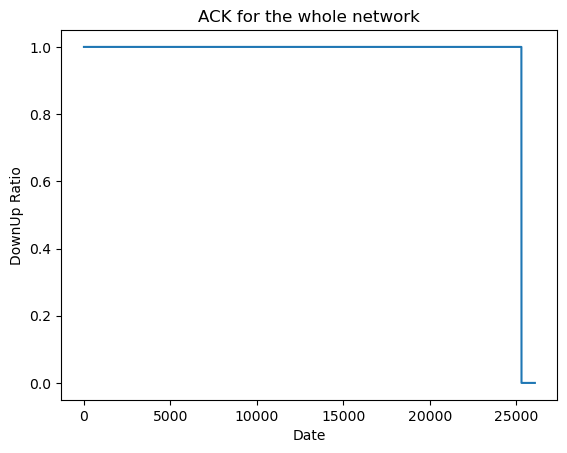

In [14]:
df_ack = df_predict['ACK.Flag.Count']
df_time = df_predict['Timestamp']
plt.plot(df_ack)
plt.title('ACK for the whole network')
plt.xlabel('Date')
plt.ylabel('DownUp Ratio')
plt.show()

In [118]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the first subplot
ip = '192.168.42.68'
df_predict = df_display
df_display2 = df_predict[(df_predict['Time'] >= '03:18:19') & (df_predict['Time'] <= '12:15:17')]
df_predict = df_display2
df_customer = df_predict.loc[df_predict['Destination.IP'] == ip]
df_Ratio = df_customer['Down.Up.Ratio']
df_time = df_customer['Time']


df_ack = df_customer['ACK.Flag.Count']
df_time = df_customer['Time']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))  # Increase height by changing the second value

# Plot for the first subplot
ax1.plot(df_time, df_Ratio)
ax1.set_title('DownUp Ratio for the whole network')
ax1.set_xlabel('Time')
ax1.set_ylabel('DownUp Ratio')
ax1.tick_params(axis='x', rotation=85)

# Plot for the second subplot
ax2.plot(df_time, df_ack)
ax2.set_title('ACK for the for One Client')
ax2.set_xlabel('Time')
ax2.set_ylabel('ACK')
ax2.tick_params(axis='x', rotation=85)

plt.tight_layout()
plt.show()

# Filter the DataFrame for the second subplot




In [17]:
stationerity = adfuller(df_predict['ACK.Flag.Count'])
print('ADF Statistic:', stationerity[0])
print('p-value:', stationerity[1])

adf_result = adfuller(stationery, autoreg=0, seasonality=12, nlags=12)
print('FOR SEASONALITY')
# If p-value < 0.05,seasonality in your model
print(f"ADF statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]"}
#if p value less than 0.5 stationery
#STATIONERY

ADF Statistic: -0.1753771338985344
p-value: 0.9413936611761027


In [27]:
#Using the rolling mean
# window_size = 20

# # Apply the rolling mean
# df['rolling_mean'] = df['Down.Up.Ratio'].rolling(window=window_size).mean()

# # Plot the original time series and the rolling mean
# plt.plot(df['Down.Up.Ratio'], label='Original Time Series')
# plt.plot(df['rolling_mean'], label=f'Rolling Mean (Window Size {window_size})', color='red')
# plt.title('Stationary Time Series with Rolling Mean')
# plt.xlabel('Date')
# plt.ylabel('Down Up Ratio')
# plt.legend()
# plt.show()

In [ ]:
#--------------------------------------------------------------CHOOSING MODEL AND USING ARIMA--------------------------------------------------------------------
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df['ACK.Flag.Count'])
plot_pacf(df['ACK.Flag.Count'])
plt.show()

In [ ]:
plot_acf(df['Down.Up.Ratio'])
plot_pacf(df['Down.Up.Ratio'])
plt.show()

In [ ]:
#-------------------------------------------------------MODEL FITTING-----------------------------------------------------------
import statsmodels.api as sm

# Fit ARIMA model
# model = sm.tsa.ARIMA(df[['Down.Up.Ratio','ACK.Flag.Count']], order=(1, 0, 0))
# results = model.fit()


# Assuming 'Down.Up.Ratio' is the variable you want to model
endog_variable = df['Down.Up.Ratio']

# Fit SARIMAX model
model = sm.tsa.SARIMAX(endog_variable, order=(1, 0, 0))
results = model.fit()

# Print model summary
print(results.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70435D+00    |proj g|=  5.31064D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.311D-06   1.704D+00
  F =   1.7043490505186252     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


                               SARIMAX Results                                
Dep. Variable:          Down.Up.Ratio   No. Observations:              1048575
Model:               SARIMAX(1, 0, 0)   Log Likelihood            -1787137.806
Date:                Mon, 22 Jan 2024   AIC                        3574279.611
Time:                        17:16:34   BIC                        3574303.337
Sample:                             0   HQIC                       3574286.128
                            - 1048575                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5898      0.000   3661.405      0.000       0.590       0.590
sigma2         1.7697      0.000   5583.269      0.000       1.769       1.770
Ljung-Box (L1) (Q):              122951.62   Jarque-

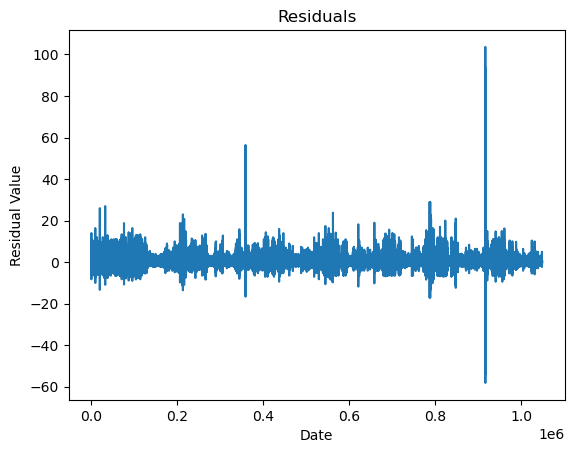

In [12]:
#-------------------------------------------------------MODEL DIAGNOSIS-------------------------------------------------------------
print(results.summary())

# Plot residuals
residuals = results.resid
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.show()

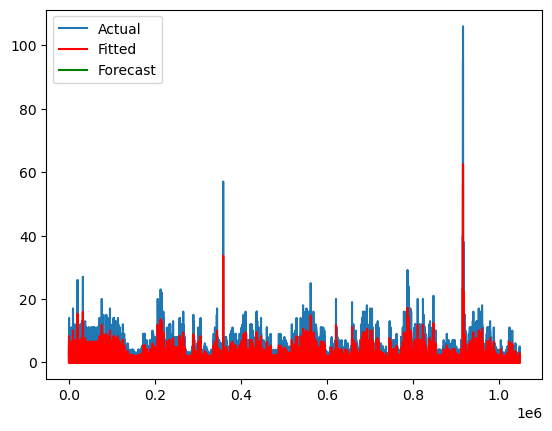

In [13]:
#---------------------------------------------------PREDICTING----------------------------------------------------------------------
forecast_steps = 10
forecast_values = results.get_forecast(steps=forecast_steps).predicted_mean

# Plot original, fitted, and forecasted values
plt.plot(df['Down.Up.Ratio'], label='Actual')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.plot(forecast_values, color='green', label='Forecast')
plt.legend()
plt.show()



In [14]:
#----------------------------------------------------------MODEL EVALUATION-----------------------------------------------------------
# Evaluate model performance
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['Down.Up.Ratio'], results.fittedvalues)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1.330308258111871
